## Unsupervised Learning

In [ ]:
# Definition: Tasks that operate on datasets without labeled responses or target values, and instead, the gocal is to capture
#             interesting structure or information.

# Applications:
# 1. Visualize structure of a complex dataset
# 2. Density estimation to predict probabilities of events
# 3. Compress data and summarize the data
# 4. Extract features for supervised learning
# 5. Discover important clusters or outliers

# e.g., group customers based on their shopping history, to analysis customers, and recommend products to specific groups

# Types:
# 1. Transformations (extract or compute information)
# 2. Clustering (find groups in the data; assign every point in the dataset to one of the groups)

## Dimensionality Reduction

In [7]:
%matplotlib notebook
import numpy as np
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
url = 'https://raw.githubusercontent.com/dongleiyin/Python/master/Coursera/fruit_data_with_colors.txt'
fruits=pd.read_table(url)
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

### PCA

In [2]:
# 1. Rotate the original data into uncorrelated dimensions
# 2. Capture the most of the variation in the original data

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# first centering data to be zero mean and unit variance
X_normalized=StandardScaler().fit_transform(X_cancer)

# standarization were applied to each column(feature)
# np.mean(X_normalized[:,0])
# np.std(X_normalized[:,0])

pca=PCA(n_components=2).fit(X_normalized)

X_pca=pca.transform(X_normalized)

print(X_cancer.shape,X_pca.shape)

print(pca.explained_variance_ratio_)  

(569, 30) (569, 2)
[0.44272026 0.18971182]


<IPython.core.display.Javascript object>


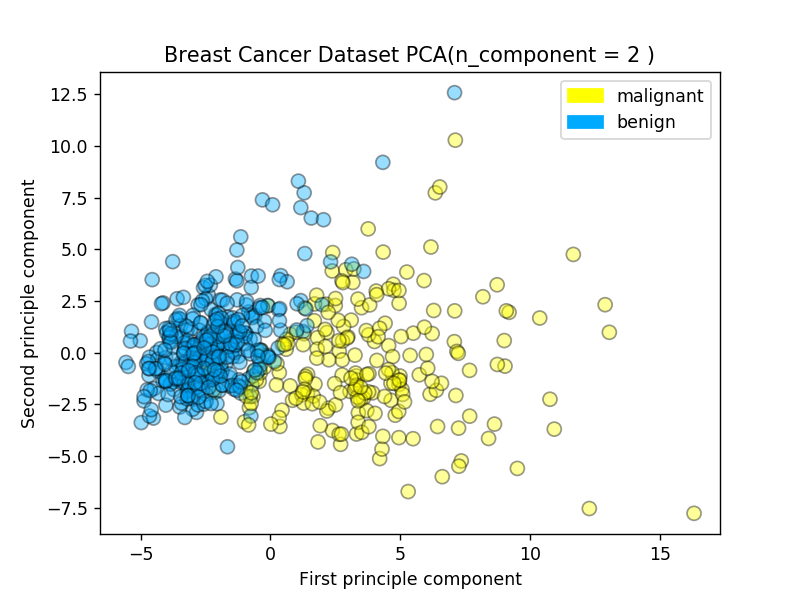

In [9]:
# visualize the PCA-transformed data

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

plot_labelled_scatter(X_pca, y_cancer, ['malignant','benign'])

plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title('Breast Cancer Dataset PCA(n_component = 2 )');

<IPython.core.display.Javascript object>


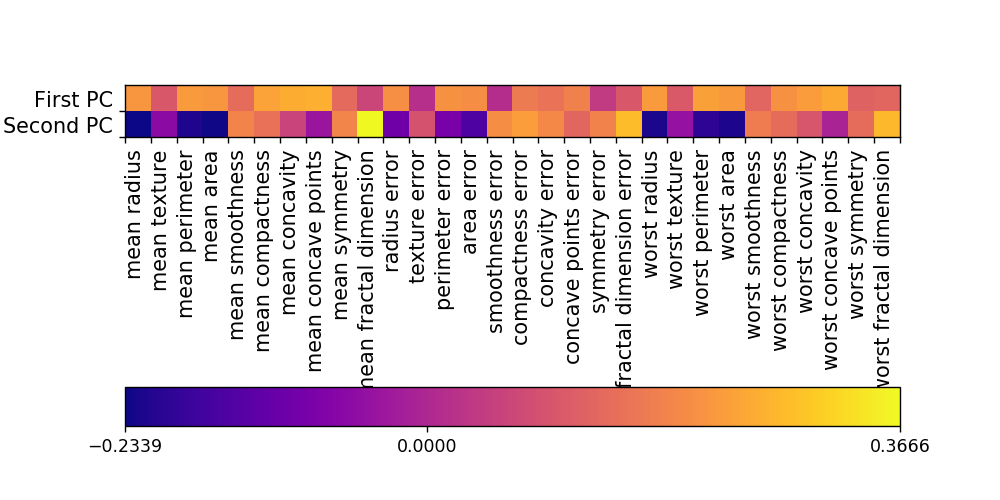

In [5]:
# Visualizing PCA components
# Plotting the magnitude of each feature value for the first two principal component


fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

### Manifod Learning (for high-dim data visualization) 

#### Multidimensional scaling (MDS)

<IPython.core.display.Javascript object>


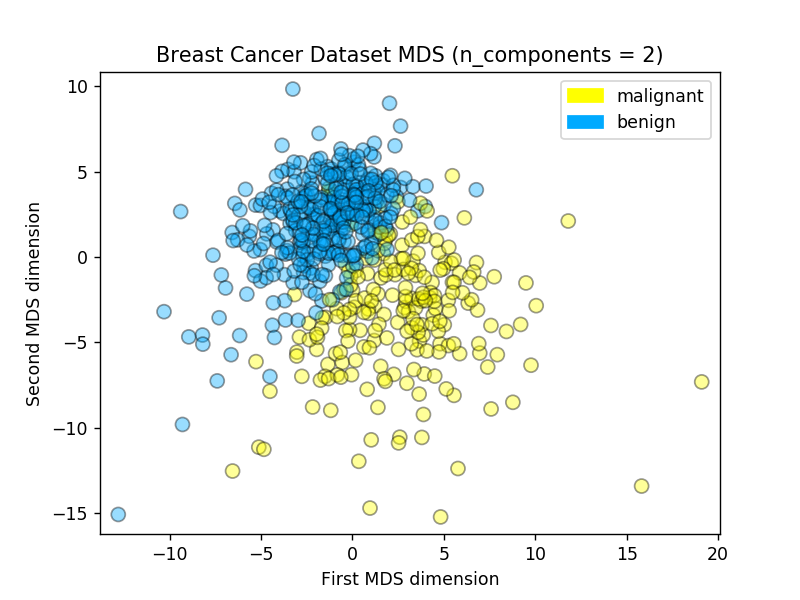

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

#### t-SNE

<IPython.core.display.Javascript object>


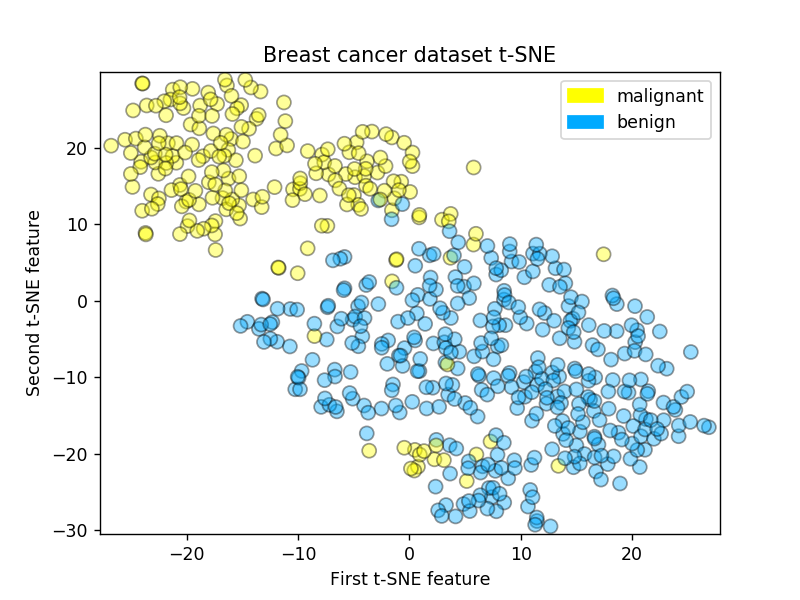

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0,n_components = 2)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

## Clustering

#### K-means

In [ ]:
# Algorithm:
# 1. Initialize the number of clusters k and pick k random points as the initial guess for the cluster centers
# 2. Assign each point to the nearest cluster center
# 3. Update each cluster center by replacing it with the mean of all points assigned to it
# 4. Repeat 2-3 until converge.


<IPython.core.display.Javascript object>


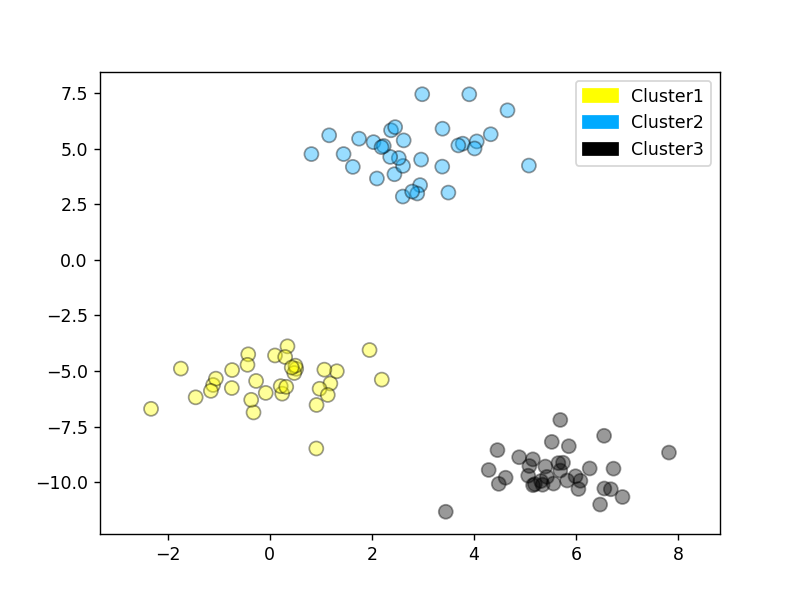

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 

X,y=make_blobs(random_state=10)

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster1', 'Cluster2','Cluster3'])


#### Agglomerative Clustering

In [ ]:
# Linkages:
# 1. Ward's method: least increase in total varaince
# 2. Average linkage: average distance between clusters
# 3. Complete linkage: max distance between clusters


<IPython.core.display.Javascript object>


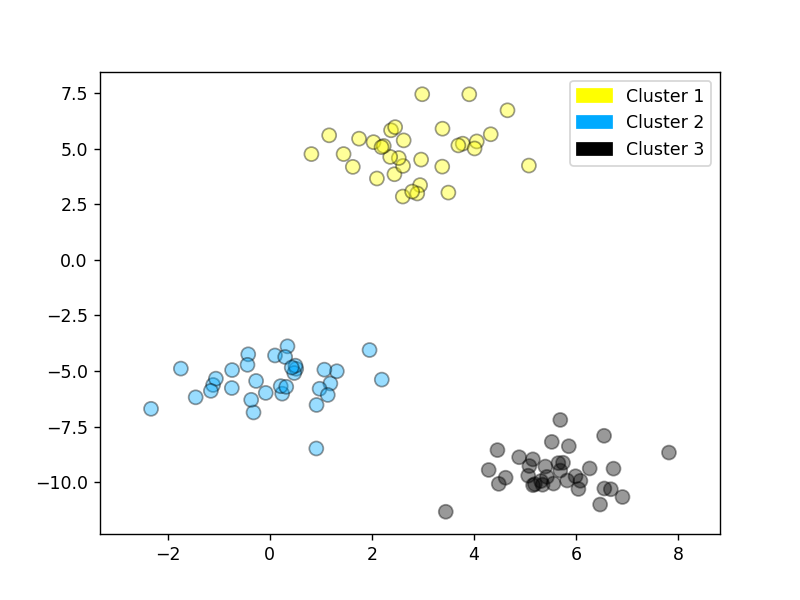

In [26]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

<IPython.core.display.Javascript object>


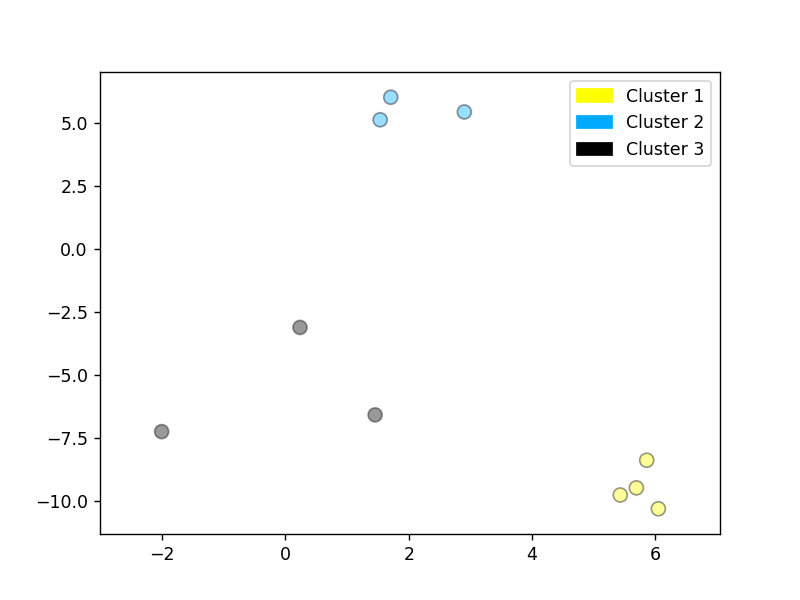

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


<IPython.core.display.Javascript object>


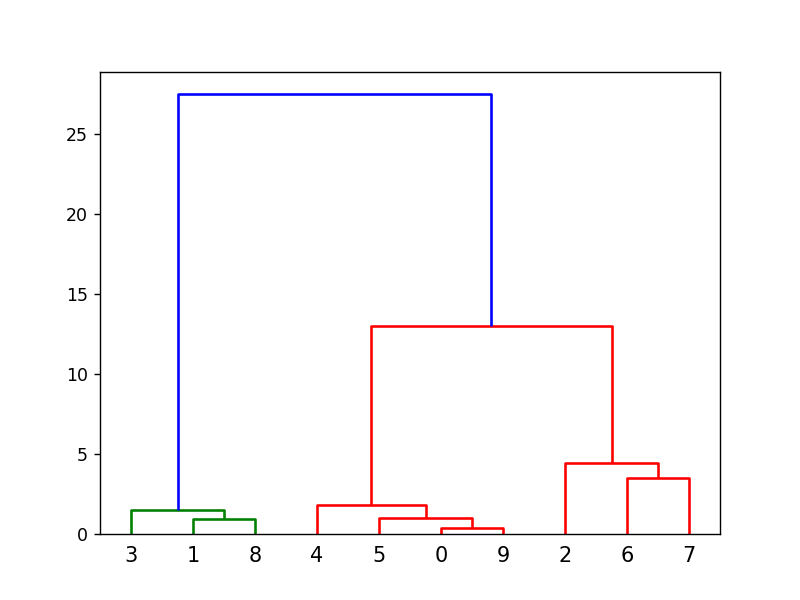

In [30]:
# Creating a dendrogram (using scipy), based on 10 selected samples
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

#### DBSCAN

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


<IPython.core.display.Javascript object>


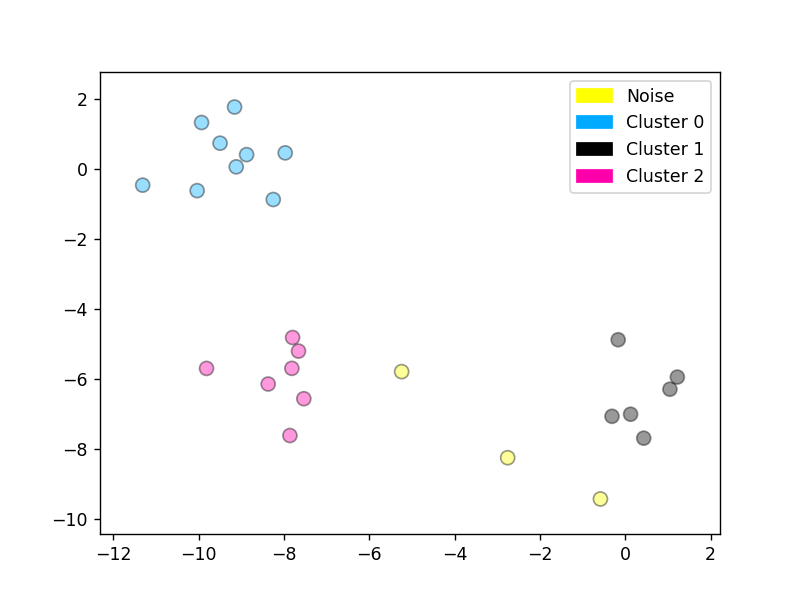

In [31]:
# No need to specify number of clusters ahead
# Good for larger dataset, efficient
# Allow to identify noise points


from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])


In [ ]:
# Comments on clustering evaluation:

# With ground truth, existing labels can be used to evaluate cluster quality
# Without ground truth, evaluation can be difficult, multiple clustering may be plausible for a dataset
# Alternatively, consider task-based evaluation: evaluating the clustering performance according to performance on a task
#                                                that does have an objective basis features for a supervised learning task, e.g, 
#                                                accuray gain after adding the clustering-based features